## Exploracion basica de un archivo .mat

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [1]:
try:
    import scipy.io
except ImportError:
    !pip install scipy

## 1. Librerias y configuraciones previas

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/trabajo-final_AA1/blob/main/notebooks_pasos_previos/exploracion_preliminar.ipynb)

In [17]:
import sys
import os

# Get the absolute path of the current notebook
notebook_path = "."
print(notebook_path)
try:
    import google.colab
    !git clone https://github.com/repos-especializacion-UdeA/trabajo-final_AA1.git
    %cd /content/trabajo-final_AA1/notebooks_pasos_previos   
    %pwd
    ruta_base = '/content/trabajo-final_AA1/notebooks_pasos_previos/'
    sys.path.append(ruta_base)
except ImportError:
    print("El notebook no se está ejecutando en Google Colab.")
    ruta_base = './'

.
El notebook no se está ejecutando en Google Colab.


In [18]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal

## 2. Funciones

In [19]:
# Funciones externas
# ==============================================================================
from utils.funciones1 import multiple_plot
from utils.funciones2 import test_hola, graficar_medida, graficar_medida2, \
                             filter_signal, segmentar_datos, aplanar_ventana

In [20]:
test_hola()

Hola amigos


## 3. Carga del dataset

In [21]:
DATA_SET_PATH = "./datasets/"

In [22]:
mat_file_path = DATA_SET_PATH + 'S1_A1_E1.mat'  
mat_data = scipy.io.loadmat(mat_file_path)
keys_mat_data = list(mat_data.keys())
print(keys_mat_data)
column_names = keys_mat_data[3:]
print(column_names)

['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']
['emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']


Segun la IA archivo .mat tiene:
* **`emg`**: Matriz con las señales EMG (10 columnas)
* **`glove`**: Matriz con datos del CyberGlove (22 columnas)
* **`stimulus`**: Vector con etiquetas de movimientos
* **`repetition`**: Vector con números de repetición
* **`rerepetition`**: Vector indicando repeticiones adicionales
* **`subject`**: Número de sujeto
* **`exercise`**: Número de ejercicio

In [23]:
# Obtencion de las columnas de interes

# Señales mECG
df_emg = pd.DataFrame(mat_data['emg'])
df_emg.columns = ['emg_' + str(col + 1) for col in df_emg.columns]

# Posturas
df_restimulus = pd.DataFrame(mat_data['restimulus'])
df_restimulus.rename(columns={0: 'label'}, inplace= True)
# df_restimulus['label'] = df_restimulus['label'].astype('category')

# Repeticiones
df_repetition = pd.DataFrame(mat_data['rerepetition'])
df_repetition.rename(columns={0: 'rep'},inplace= True)
# df_repetition['repetition'] = df_repetition['repetition'].astype('category')

df_s1_e1 =  pd.concat([df_emg, df_repetition, df_restimulus], axis=1)

In [24]:
df_s1_e1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   emg_1   101014 non-null  float64
 1   emg_2   101014 non-null  float64
 2   emg_3   101014 non-null  float64
 3   emg_4   101014 non-null  float64
 4   emg_5   101014 non-null  float64
 5   emg_6   101014 non-null  float64
 6   emg_7   101014 non-null  float64
 7   emg_8   101014 non-null  float64
 8   emg_9   101014 non-null  float64
 9   emg_10  101014 non-null  float64
 10  rep     101014 non-null  uint8  
 11  label   101014 non-null  uint8  
dtypes: float64(10), uint8(2)
memory usage: 7.9 MB


In [25]:
df_s1_e1.head(2)

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0


## Graficas

### Grafica de las señales

A continuación se muestra la grafica de las señales de cada par de electrodos junto con las doce posturas realizadas y las 10 repeticiones de cada postura. Los valores de la grafica en las que las posturas (y las repeticiones son 0) es por que se esta en una posición de descanso. Tengase en cuenta que cada captura se realiza a 100 Hz.

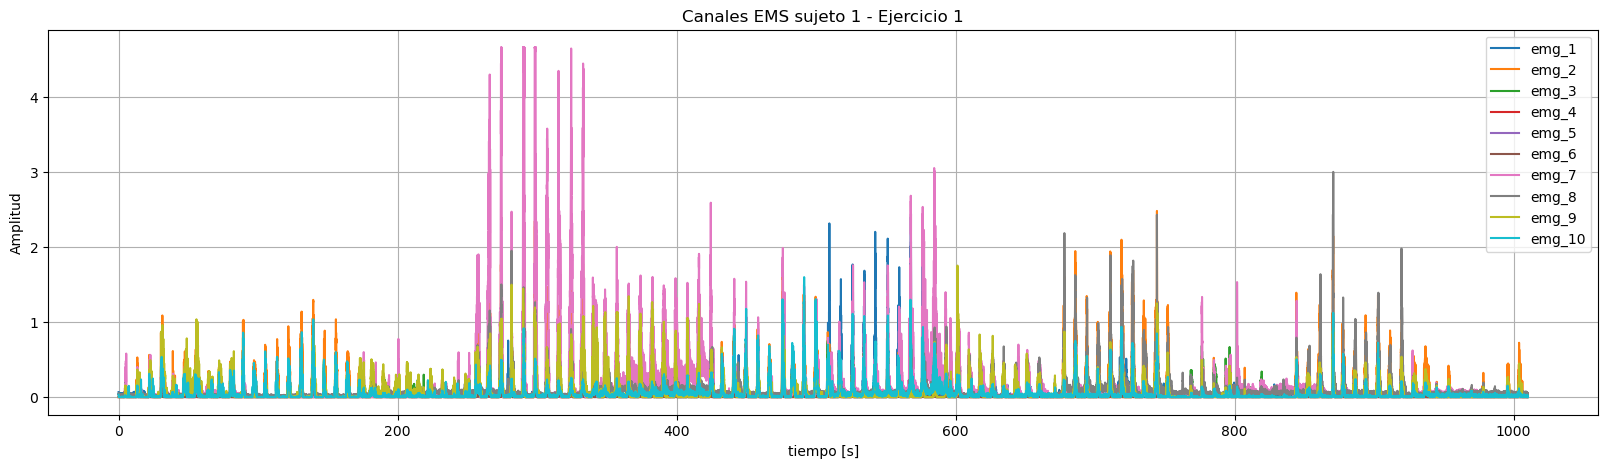

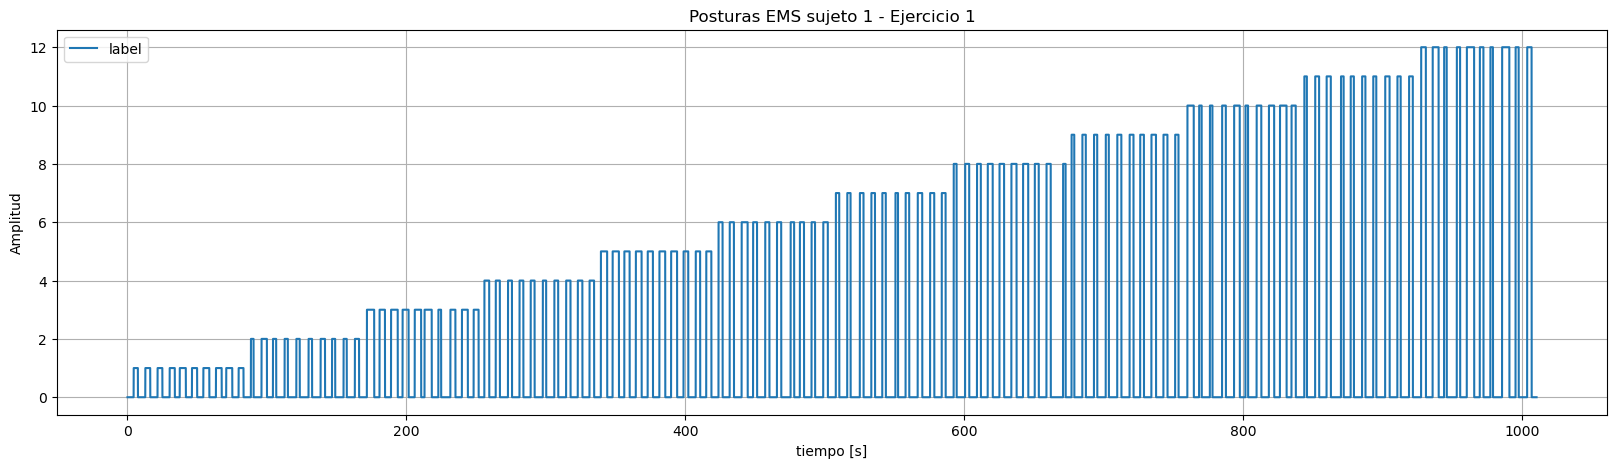

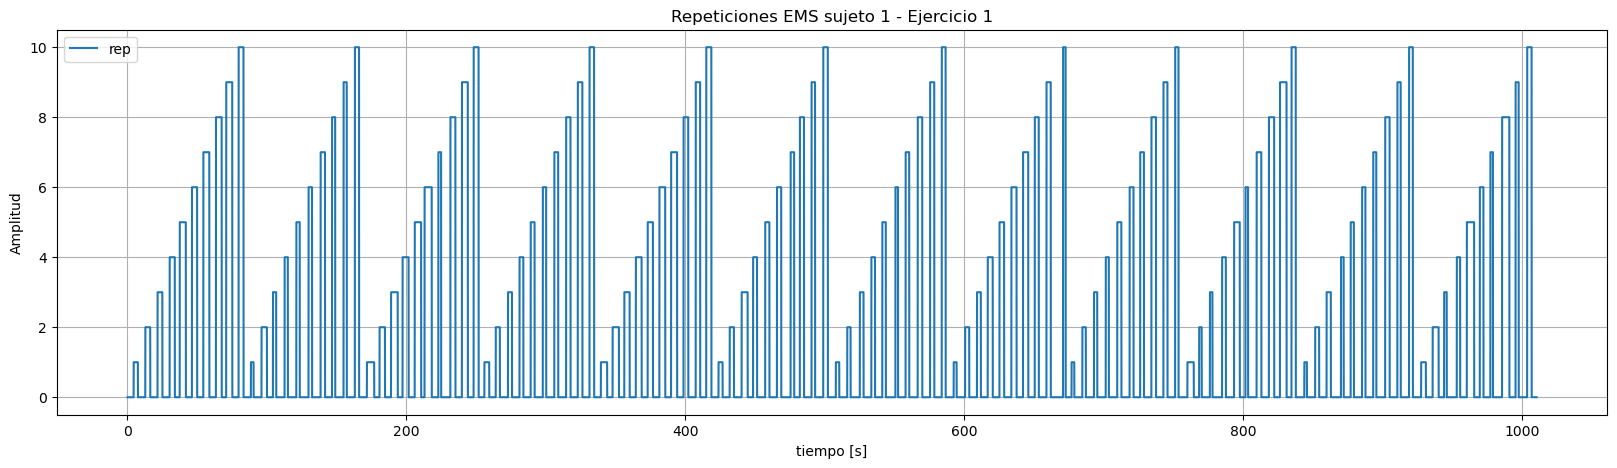

In [26]:
graficar_medida(df_s1_e1, 
                columnas=['emg_1','emg_2','emg_3','emg_4','emg_5','emg_6','emg_7','emg_8','emg_9','emg_10'], 
                fs = 100,
                titulo = "Canales EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1_e1, 
                columnas=['label'], 
                fs = 100,
                titulo = "Posturas EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1_e1, 
                columnas=['rep'], 
                fs = 100,
                titulo = "Repeticiones EMS sujeto 1 - Ejercicio 1")

En la siguiente grafica se va a hacer enfasis en los ejercicios realizados para la postura 1:
  - [ ] Corregir la forma como se hace la captura de modo que no se pierdan los datos de la posición de descanso a la izquierda de la primera repetición.

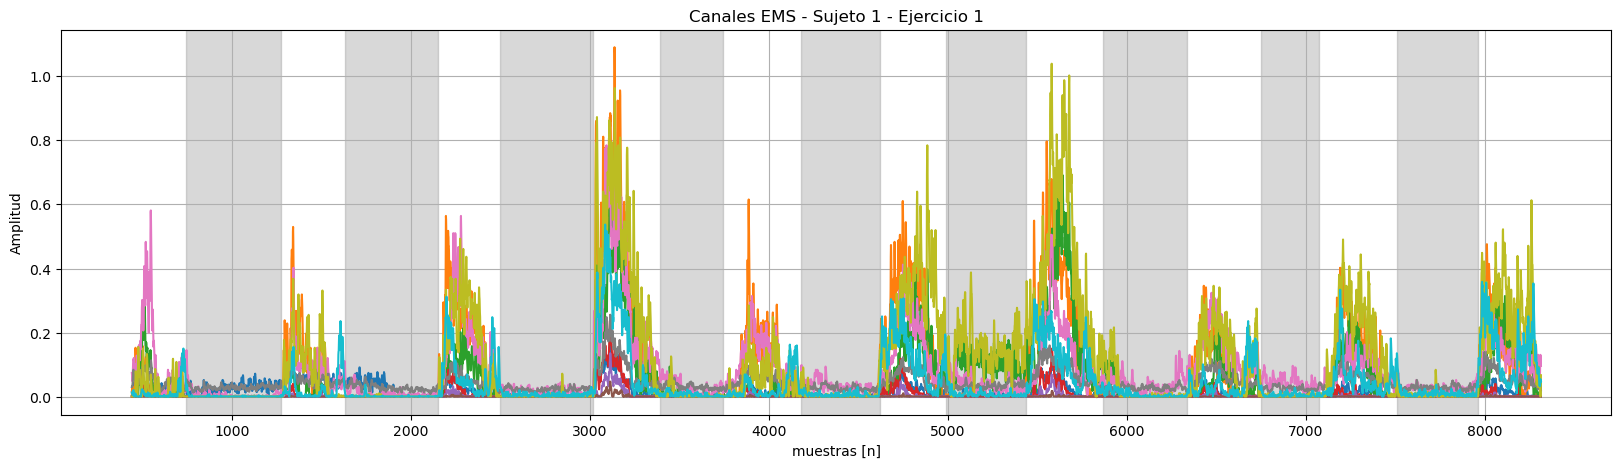

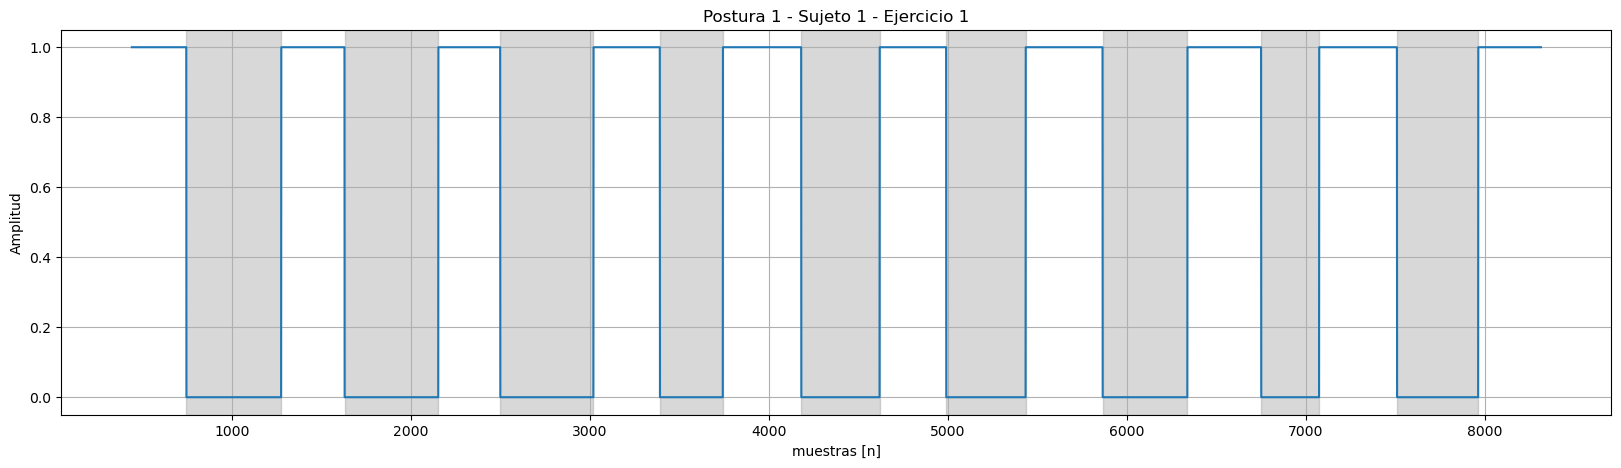

In [27]:
# Funciones sobre las señales

graficar_medida2(df_s1_e1, 
                 columnas = df_s1_e1.columns[0:10], 
                 labels = df_s1_e1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(df_s1_e1, 
                 columnas = ['label'], 
                 labels = df_s1_e1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

## Preprocesamiento de la señal

### Filtrado de ruido

A continuación se realiza un filtrado de ruido de la señal

In [28]:
# perform 2-order 1Hz low-pass filter
emgs_df_filt =  filter_signal(df_s1_e1.iloc[:,0:10])  
df_s1_e1_filt =  pd.concat([emgs_df_filt, df_repetition , df_restimulus], axis=1)
df_s1_e1_filt.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0


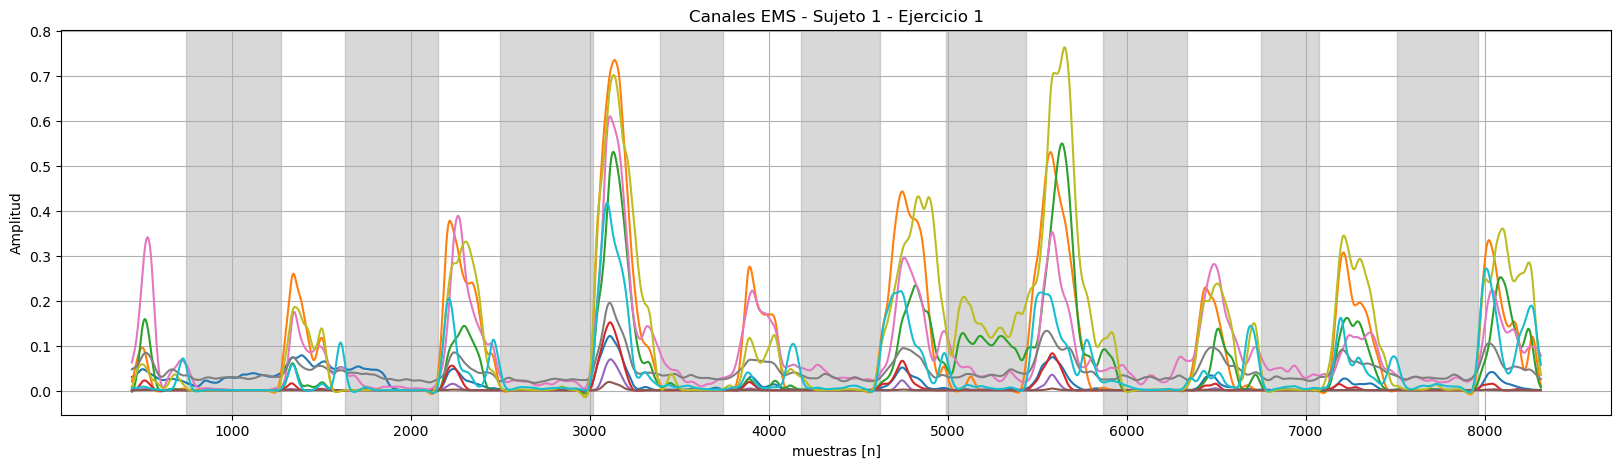

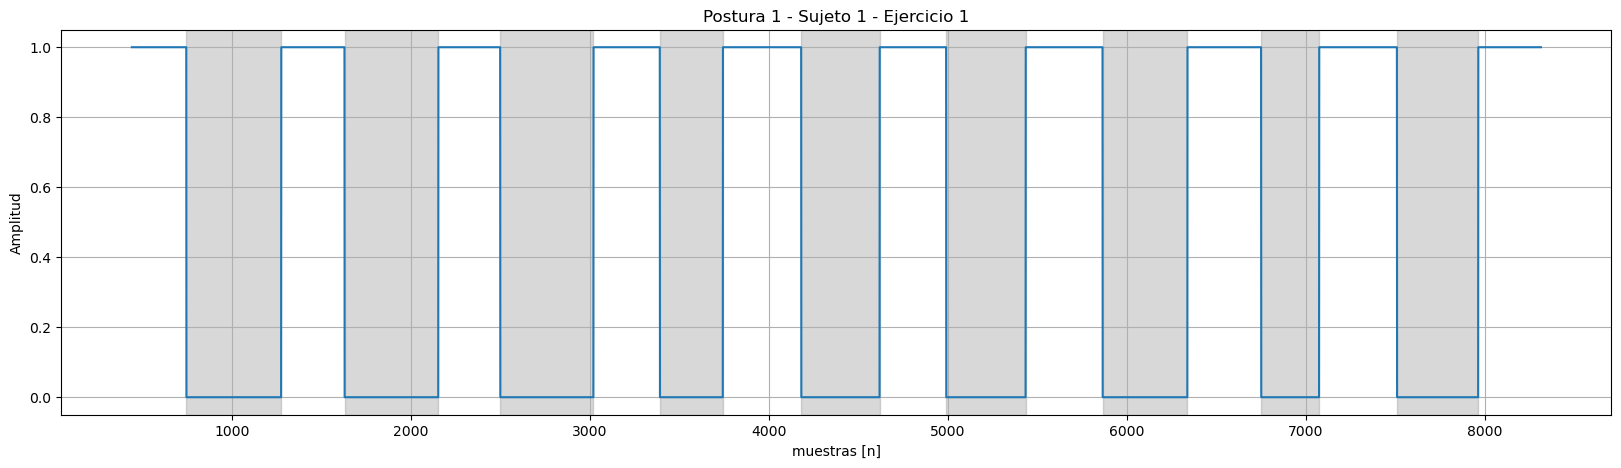

In [29]:
graficar_medida2(df_s1_e1_filt, 
                 columnas = df_s1_e1_filt.columns[0:10], 
                 labels = df_s1_e1_filt['label'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(df_s1_e1_filt, 
                 columnas = ['label'], 
                 labels = df_s1_e1_filt['label'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

## Segmentación

A continuación se divide la señal en ventanas

In [30]:
s = segmentar_datos(emgs_df_filt, df_s1_e1_filt['label'], df_s1_e1_filt['rep'], 30, 10)
# Puede se sea necesario revisar la funcion que segmenta por ventanas (ver grafico...)

4704


In [31]:
df_s1_e1_filt.head(40)

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0
5,0.061362,0.002404,0.002415,0.002407,0.002395,0.008192,0.0024,0.047061,0.0024,0.027410,0,0
6,0.060156,0.002405,0.002419,0.002407,0.002396,0.007881,0.0024,0.046395,0.0024,0.026096,0,0
7,0.058966,0.002406,0.002422,0.002408,0.002396,0.007576,0.0024,0.045729,0.0024,0.024805,0,0
8,0.057793,0.002406,0.002425,0.002409,0.002396,0.007278,0.0024,0.045064,0.0024,0.023539,0,0
9,0.056641,0.002407,0.002428,0.002410,0.002396,0.006986,0.0024,0.044399,0.0024,0.022300,0,0


In [32]:
s[0]

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0
5,0.061362,0.002404,0.002415,0.002407,0.002395,0.008192,0.0024,0.047061,0.0024,0.027410,0,0
6,0.060156,0.002405,0.002419,0.002407,0.002396,0.007881,0.0024,0.046395,0.0024,0.026096,0,0
7,0.058966,0.002406,0.002422,0.002408,0.002396,0.007576,0.0024,0.045729,0.0024,0.024805,0,0
8,0.057793,0.002406,0.002425,0.002409,0.002396,0.007278,0.0024,0.045064,0.0024,0.023539,0,0
9,0.056641,0.002407,0.002428,0.002410,0.002396,0.006986,0.0024,0.044399,0.0024,0.022300,0,0


In [33]:
s[1]

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,0.045784,0.002419,0.002461,0.002423,0.002402,0.004338,0.0024,0.037171,0.0024,0.010982,0,0
1,0.044986,0.002420,0.002464,0.002425,0.002403,0.004152,0.0024,0.036524,0.0024,0.010183,0,0
2,0.044221,0.002422,0.002467,0.002426,0.002404,0.003976,0.0024,0.035881,0.0024,0.009423,0,0
3,0.043488,0.002423,0.002470,0.002428,0.002405,0.003808,0.0024,0.035243,0.0024,0.008701,0,0
4,0.042789,0.002425,0.002474,0.002429,0.002406,0.003649,0.0024,0.034611,0.0024,0.008017,0,0
5,0.042121,0.002426,0.002477,0.002431,0.002407,0.003500,0.0024,0.033986,0.0024,0.007370,0,0
6,0.041485,0.002428,0.002480,0.002432,0.002408,0.003358,0.0024,0.033369,0.0024,0.006760,0,0
7,0.040880,0.002429,0.002484,0.002434,0.002410,0.003225,0.0024,0.032763,0.0024,0.006185,0,0
8,0.040305,0.002431,0.002487,0.002435,0.002411,0.003100,0.0024,0.032168,0.0024,0.005646,0,0
9,0.039760,0.002432,0.002491,0.002437,0.002413,0.002984,0.0024,0.031586,0.0024,0.005140,0,0


In [36]:
w_plana = aplanar_ventana(s[0])
w_plana

30 10
Index(['emg_1', 'emg_2', 'emg_3', 'emg_4', 'emg_5', 'emg_6', 'emg_7', 'emg_8',
       'emg_9', 'emg_10'],
      dtype='object')
[0.06752279 0.06628393 0.06504509 0.06380968 0.06258099 0.06136215
 0.06015613 0.05896565 0.05779326 0.05664125 0.05551175 0.05440669
 0.05332783 0.05227676 0.05125489 0.05026335 0.04930299 0.04837445
 0.04747821 0.0466146  0.04578381 0.0449859  0.04422083 0.04348848
 0.04278863 0.04212095 0.04148492 0.04087992 0.0403053  0.0397605
 0.00240159 0.00240207 0.00240258 0.00240313 0.00240372 0.00240435
 0.00240502 0.00240573 0.00240649 0.00240728 0.00240812 0.00240901
 0.00240994 0.00241092 0.00241194 0.00241301 0.00241412 0.00241528
 0.00241648 0.00241773 0.00241902 0.00242035 0.00242172 0.00242312
 0.00242457 0.00242604 0.00242755 0.00242908 0.00243063 0.0024322
 0.00239855 0.00240184 0.00240519 0.00240858 0.00241199 0.00241538
 0.00241875 0.00242207 0.00242532 0.00242848 0.00243157 0.00243459
 0.00243756 0.00244049 0.0024434  0.0024463  0.0024492  0.002452

,emg_1_0,emg_2_0,emg_3_0,emg_4_0,emg_5_0,emg_6_0,emg_7_0,emg_8_0,emg_9_0,emg_10_0,...,emg_3_29,emg_4_29,emg_5_29,emg_6_29,emg_7_29,emg_8_29,emg_9_29,emg_10_29,rep,label
0,0.067523,0.066284,0.065045,0.06381,0.062581,0.061362,0.060156,0.058966,0.057793,0.056641,...,0.009423,0.008701,0.008017,0.00737,0.00676,0.006185,0.005646,0.00514,0,0


In [ ]:
w_plana.columns

## Graficas

**Pendiente**: 
* Cuadrar de tal manera que lo que entre sea un dataframe o un array, segun sea el caso.
* Cuadrar para que se almacene el numero de la repeticion (puede servir como tag para separacion de datos de entrenamiento y test).

## Pendientes

Ver los siguientes codigos:
* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition (codigo + tesis)
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad


En https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/ esta lo que necesitamos de alguna manera.